In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/ My Drive/Colab_TA/Dataset.csv", usecols=["Tanggal", "Kurs Jual"] )
df['Tanggal']= pd.to_datetime(df.Tanggal)
df

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
...,...,...
2704,2021-12-27,16202.12
2705,2021-12-28,16174.64
2706,2021-12-29,16202.59
2707,2021-12-30,16182.85


In [4]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
5,2011-01-10,11723.36
6,2011-01-11,11834.54
7,2011-01-12,11831.54
8,2011-01-13,11923.25
9,2011-01-14,12144.12


# Visualisasi Data

Text(0, 0.5, 'Kurs Jual')

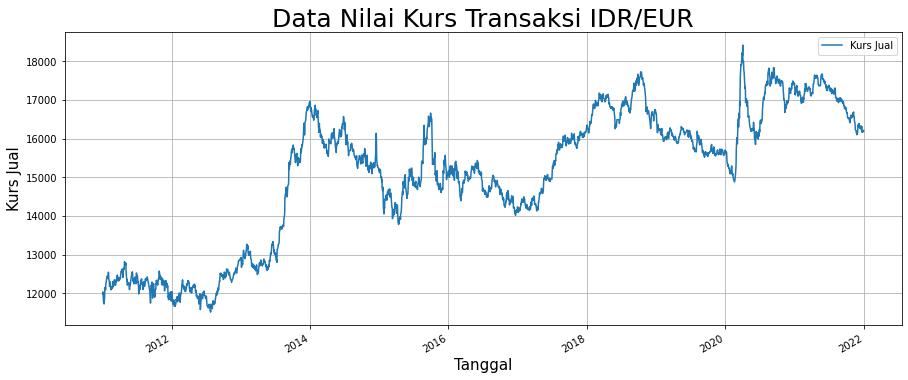

In [5]:
df.plot(x='Tanggal', y='Kurs Jual', grid='True', figsize=(15,6))
plt.title('Data Nilai Kurs Transaksi IDR/EUR', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Kurs Jual', fontsize = 15)

### Visualisasi Data (Per Bulan) 

In [6]:
vis = px.line(df, x="Tanggal", y="Kurs Jual", title="Data Kurs Transaksi IDR/EUR")
vis.update_xaxes(dtick="M1", tickformat="%b\t%Y", ticklabelmode="period")
vis.update_layout(autosize=False, width=1600, height=850)
vis.show()

# Menentukan independent Variabel (X) and dependent Variabel (Y)

### Kurs Jual (Dataset ) 

In [7]:
Kurs_Jual = np.array(df['Kurs Jual'])
Kurs_Jual = Kurs_Jual.reshape(-1,1)
print(Kurs_Jual)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


### Menentukan X dan y 

In [8]:
#Menghapus kolom tabel tanggal
df.drop(['Tanggal'],axis=1,inplace=True)
df

,Kurs Jual
0,11983.50
1,12035.82
2,11993.59
3,11877.25
4,11778.29
5,11723.36
6,11834.54
7,11831.54
8,11923.25
9,12144.12


In [9]:
#Menentukan VariabeL untuk memprediksi 10 hari ke depan
prediction_future = 10
#Membuat variabel dependent atau target prediksi (kolom)  
df['Variabel Dependent (y)'] = df['Kurs Jual'].shift(prediction_future).fillna(pd.Series(reversed(df['Kurs Jual'])))
df

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


In [10]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


### Variabel Independent (x) 

In [11]:
#Membuat (mengambil hanya kolom kurs Jual ) Variabel Independent (X)
X = np.array(df.drop(['Variabel Dependent (y)'], axis=1))
print(X)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


In [12]:
X.shape

(2709, 1)

### Variabel Independent (y)

In [13]:
#Membuat (mengambil hanya kolom variabel dependent (y))
y = np.array(df['Variabel Dependent (y)'])
y=y.reshape(-1,1)
print(y)

[[16208.9 ]
 [16182.85]
 [16202.59]
 ...
 [16272.68]
 [16247.24]
 [16317.46]]


In [14]:
y.shape

(2709, 1)

### 10 hari Data Terakhir

In [15]:
#Membuat variabel prediction_days_array yang sama dengan 10 baris terakhir dari kumpulan dataset asli
actual_10days_array = np.array(df.drop(['Variabel Dependent (y)'],axis = 1))[-prediction_future:]
                                 
print(actual_10days_array)

[[16317.46]
 [16294.71]
 [16298.33]
 [16161.64]
 [16202.77]
 [16202.12]
 [16174.64]
 [16202.59]
 [16182.85]
 [16208.9 ]]


# Normalisasi Data

### Kurs Jual (Dataset) 

In [45]:
sc_KursJual = MinMaxScaler()
KursJual_scale = sc_KursJual.fit_transform(Kurs_Jual)
print(KursJual_scale)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel X 

In [17]:
scalerX =MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)
print(X)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel Y 

In [18]:
scalerY= MinMaxScaler()
scalerY.fit(y)
Y=scalerY.transform(y)
print(Y)

[[0.68023369]
 [0.67646011]
 [0.67931963]
 ...
 [0.6894728 ]
 [0.68578758]
 [0.69595959]]


### 10 Hari Data Terakhir 

In [19]:
sc_ActualArray = MinMaxScaler()
Actual10_scale = sc_ActualArray.fit_transform(actual_10days_array)
print(Actual10_scale)

[[1.        ]
 [0.8539982 ]
 [0.87723014]
 [0.        ]
 [0.26395841]
 [0.25978693]
 [0.0834296 ]
 [0.26280323]
 [0.1361186 ]
 [0.30329868]]


# Data Spliting

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1896, 1) (1896, 1)
(813, 1) (813, 1)


# Parameter Tuning

In [21]:
#Parameter dan kernel yang akan di uji
parameters_kernel = {'C': [0.1, 1, 10, 100],
                     'gamma' :[1, 0.1, 0.01, 0.001,],
                     'epsilon': [1e-4, 1e-3],
                     'kernel' :['rbf', 'poly', 'linear']}
#Mengukur score parameter tuning dengan rmse
def rmse(actual, predict):# penerapan sklearn.metrics
    prediksi = np.array(predict)
    aktual = np.array(actual)
    distance = prediksi - aktual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better=False)
model = SVR()
grid_search = GridSearchCV(SVR(),parameters_kernel,cv = 5, scoring=rmse_score, refit = True, verbose =3)
grid_search.fit(x_train,np.ravel(y_train))#penerapan scoring parameter sklearn.model_selection.cross_val_score

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.042 total time=   0.2s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.061 total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.058 total time=   0.2s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.055 total time=   0.2s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.068 total time=   0.2s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.129 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.124 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.145 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.125 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.130 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.000

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=3)

In [22]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'epsilon': 0.001, 'gamma': 1, 'kernel': 'rbf'}
-0.056913987351521866


# Model SVR

In [23]:
model10_svr = SVR(kernel='rbf', C=0.1 ,epsilon=0.001, gamma=1)
model10_svr.fit(x_train,np.ravel(y_train))

SVR(C=0.1, epsilon=0.001, gamma=1)

# Evaluasi Model

In [24]:
y_pred_test= model10_svr.predict(x_test)
y_pred_train = model10_svr.predict(x_train)

In [30]:
print('MSE  Train : {0:.5f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE  Train : {0:.5f}'.format(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R^2 Train : {0:.5f}'.format(r2_score(y_train, y_pred_train)))

MSE  Train : 0.00331
RMSE  Train : 0.05752
R^2 Train : 0.94881


In [31]:
print('MSE  Test : {0:.5f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE Test : {0:.5f}'.format(math.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R^2 Test: {0:.5f}'.format(r2_score(y_test, y_pred_test)))

MSE  Test : 0.00318
RMSE Test : 0.05636
R^2 Test: 0.95003


# Visualisasi Hasil

In [32]:
#Convert 1d array y to 2d
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

### Plot Prediksi VS Aktual (Test)

In [33]:
nilai_PrediksiTest = scalerX.inverse_transform(y_pred_test2d)
print(nilai_PrediksiTest)

[[12376.77916187]
 [16518.35495498]
 [12177.26936662]
 [17430.53521789]
 [16007.97288964]
 [17564.00166352]
 [13153.21286919]
 [12184.89910696]
 [15747.67449429]
 [12356.60523491]
 [16486.59096835]
 [17340.17662103]
 [16061.66075835]
 [15009.40982976]
 [16977.71506402]
 [15054.68161049]
 [12171.42314911]
 [16765.68495472]
 [16565.60328668]
 [16819.17085077]
 [12068.06570996]
 [15481.84444836]
 [12219.93262567]
 [14580.02742401]
 [17301.61617996]
 [15330.31285494]
 [16019.5664275 ]
 [14969.1558972 ]
 [15008.00135192]
 [14116.83182165]
 [13015.44096399]
 [14592.70981335]
 [16942.43183415]
 [12423.75788785]
 [16854.17036768]
 [17486.25291335]
 [14649.8082259 ]
 [11999.13972318]
 [15470.96244245]
 [15282.35002776]
 [12154.0531922 ]
 [17446.26585196]
 [17409.5751485 ]
 [16353.82439888]
 [15824.40971835]
 [15197.54672675]
 [16185.09490384]
 [13947.14153918]
 [16859.77981116]
 [12343.1153833 ]
 [12471.3518151 ]
 [12997.45864745]
 [16803.601089  ]
 [12135.54417696]
 [12064.54428298]
 [14840.80

In [34]:
nilai_test = scalerX.inverse_transform(y_test2d)
print(nilai_test)

[[12506.94]
 [16759.74]
 [12177.06]
 [17356.5 ]
 [16194.84]
 [17908.82]
 [12893.55]
 [12353.57]
 [15557.65]
 [11834.54]
 [16789.6 ]
 [17234.71]
 [16112.54]
 [15232.62]
 [16994.79]
 [15476.36]
 [12396.92]
 [16812.53]
 [16614.39]
 [17459.26]
 [11966.02]
 [15471.24]
 [12094.82]
 [14443.74]
 [17021.34]
 [15554.71]
 [16106.45]
 [15161.98]
 [15085.19]
 [14233.51]
 [13017.06]
 [14379.31]
 [17494.17]
 [12490.02]
 [17221.85]
 [17383.61]
 [14826.16]
 [11892.99]
 [15737.39]
 [15543.89]
 [11983.5 ]
 [17393.61]
 [17563.48]
 [15258.35]
 [15814.22]
 [15143.94]
 [15858.57]
 [14391.94]
 [16483.31]
 [12482.1 ]
 [12643.13]
 [12875.38]
 [17103.12]
 [12466.46]
 [12216.46]
 [15007.51]
 [12301.98]
 [12200.18]
 [17080.05]
 [14806.4 ]
 [12486.16]
 [14451.67]
 [17478.83]
 [16906.1 ]
 [15878.96]
 [17964.34]
 [15579.93]
 [12412.37]
 [16668.84]
 [15817.6 ]
 [15691.85]
 [12178.51]
 [14227.89]
 [11697.21]
 [14750.54]
 [13919.79]
 [14995.44]
 [11812.71]
 [12440.36]
 [13312.25]
 [14240.32]
 [14739.93]
 [12711.32]
 [12

In [35]:
nilai_PrediksiTest.shape

(813, 1)

<function matplotlib.pyplot.show(*args, **kw)>

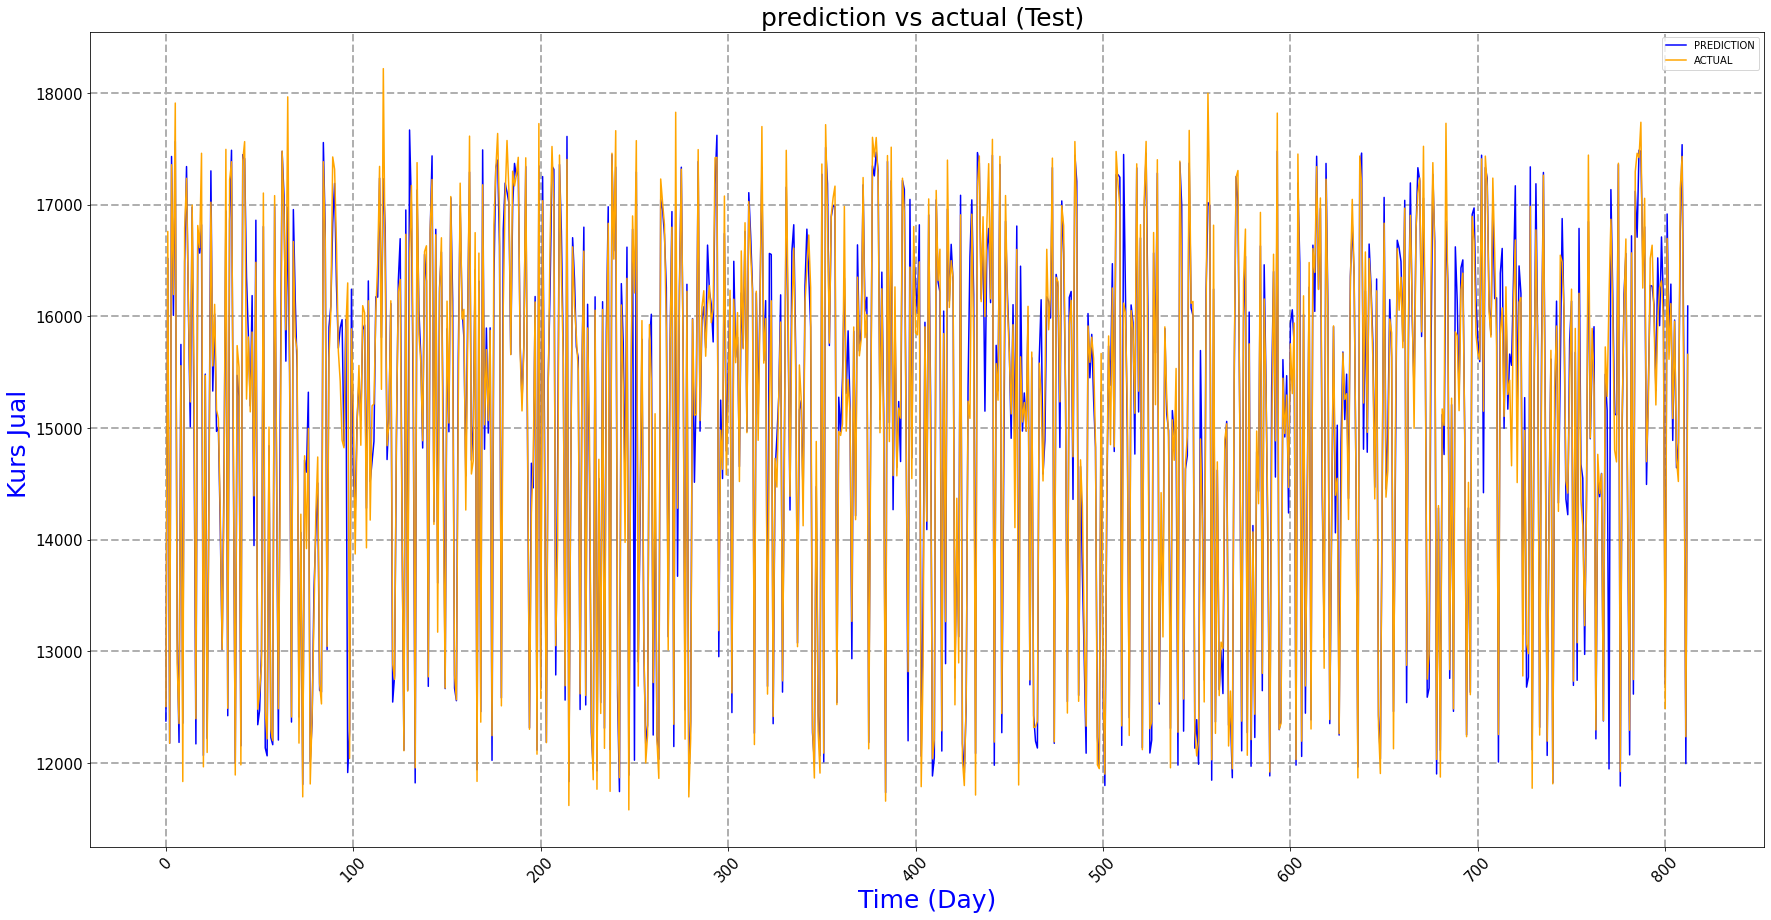

In [36]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest,label='PREDICTION', color='blue')
plt.plot(nilai_test,label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) ', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

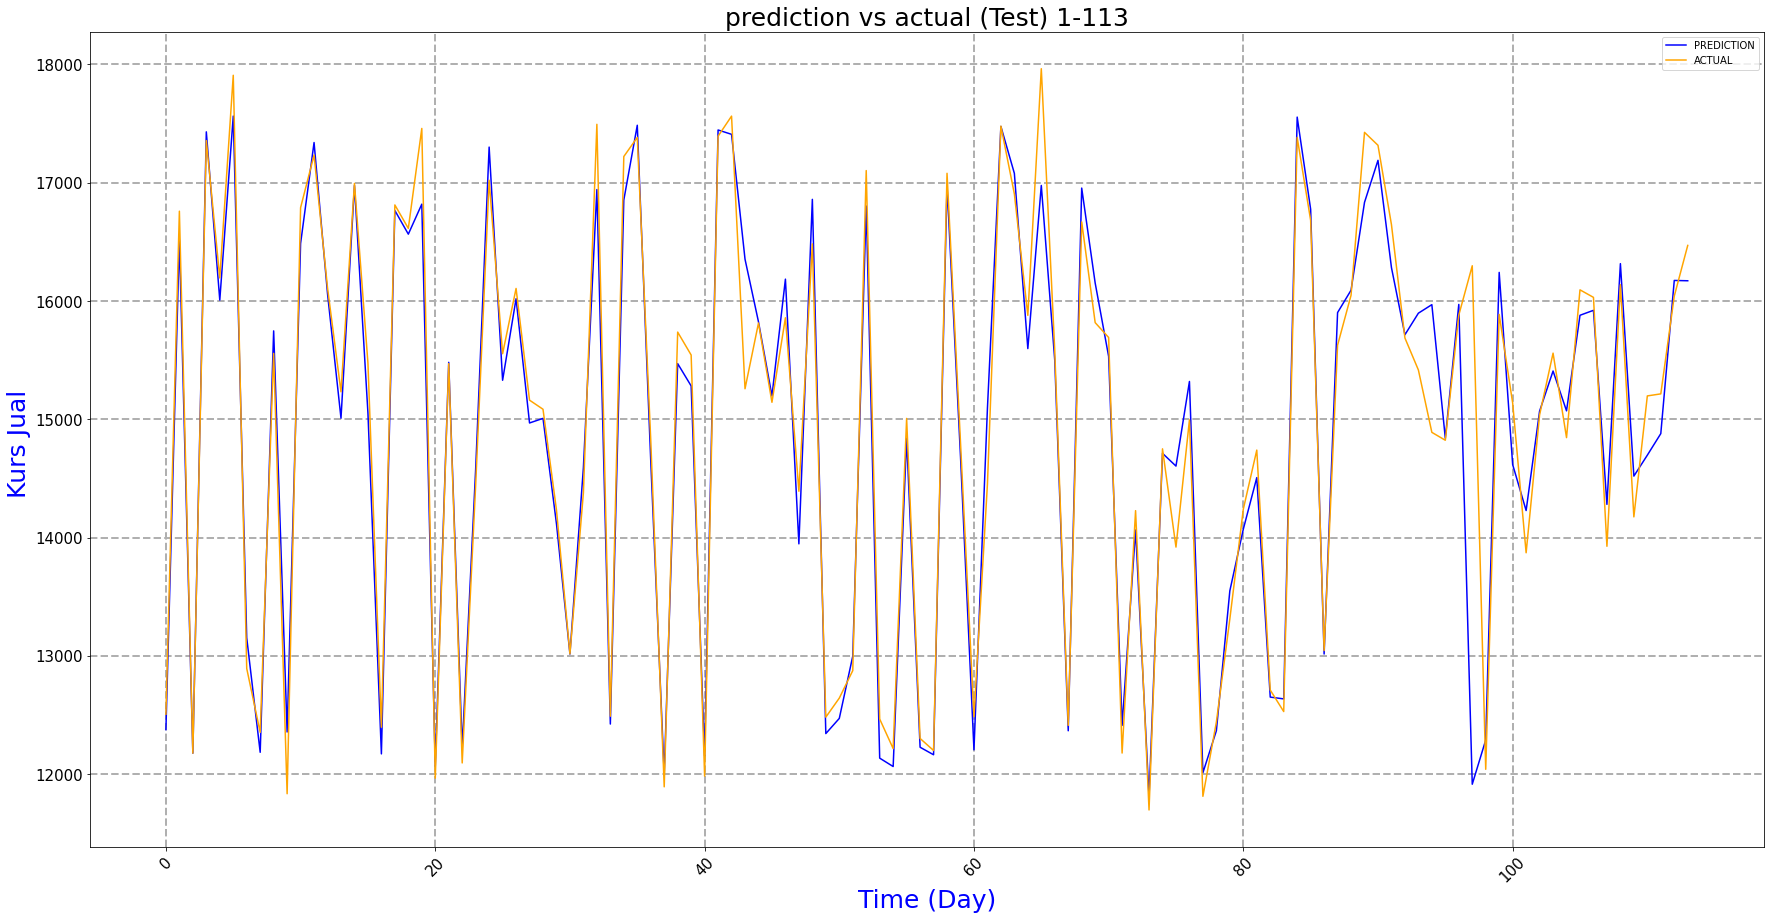

In [37]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[0:114],label='PREDICTION', color='blue')
plt.plot(nilai_test[0:114],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 1-113', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

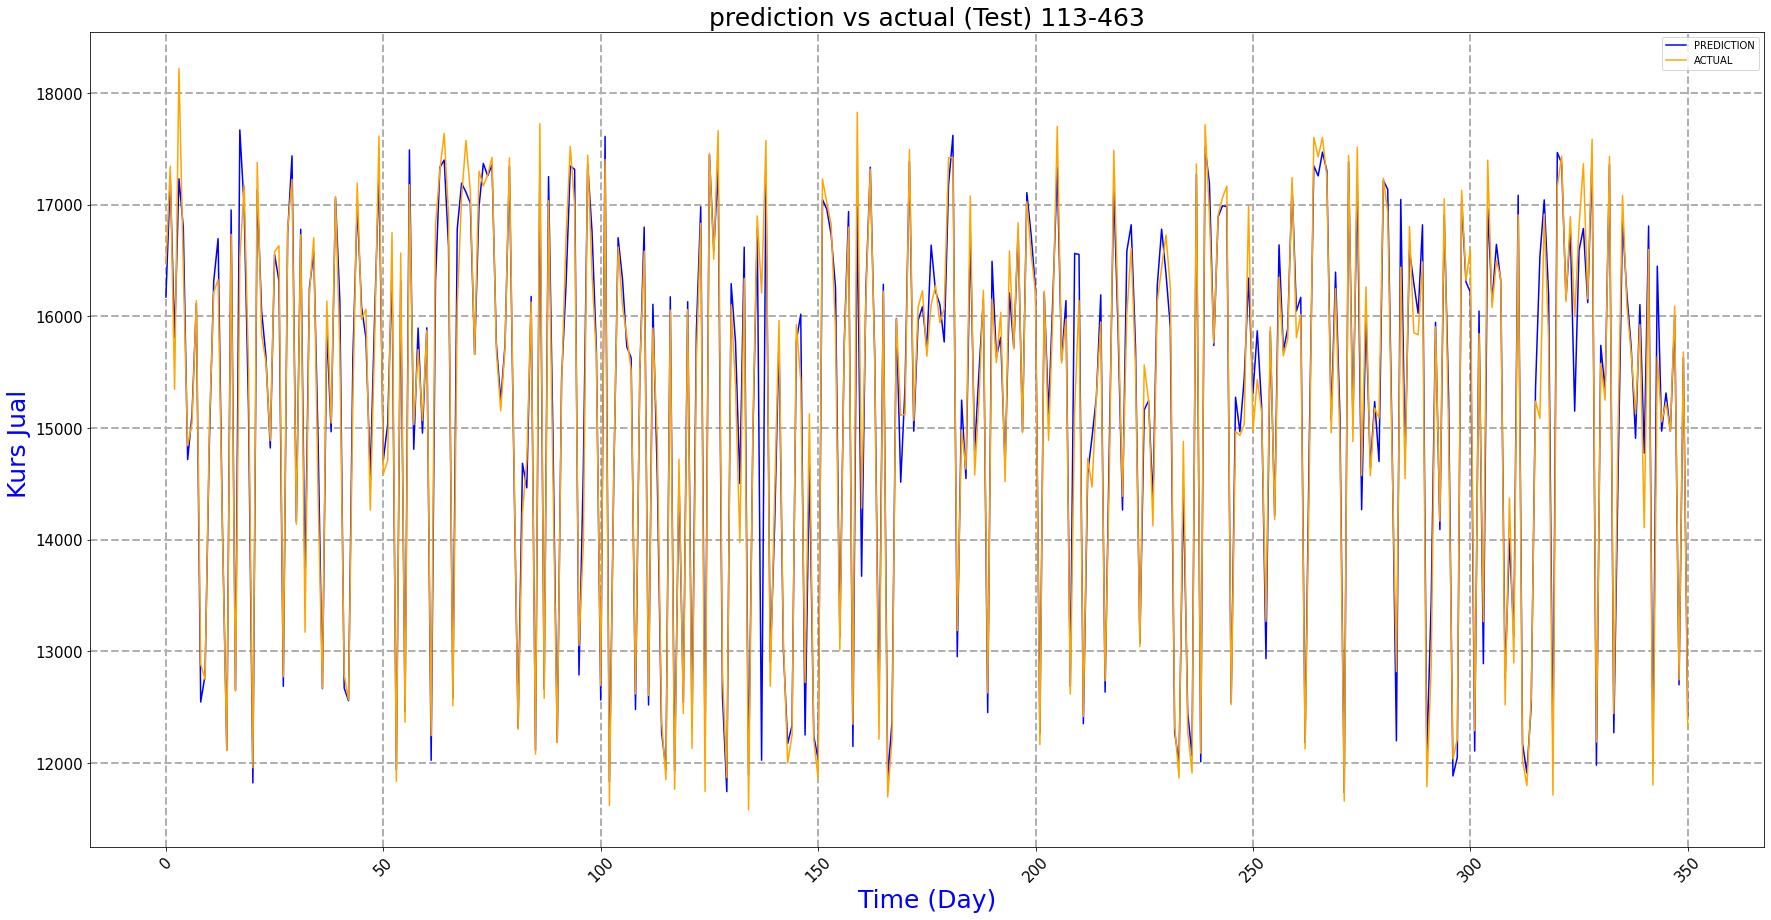

In [38]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[113:464],label='PREDICTION', color='blue')
plt.plot(nilai_test[113:464],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 113-463', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

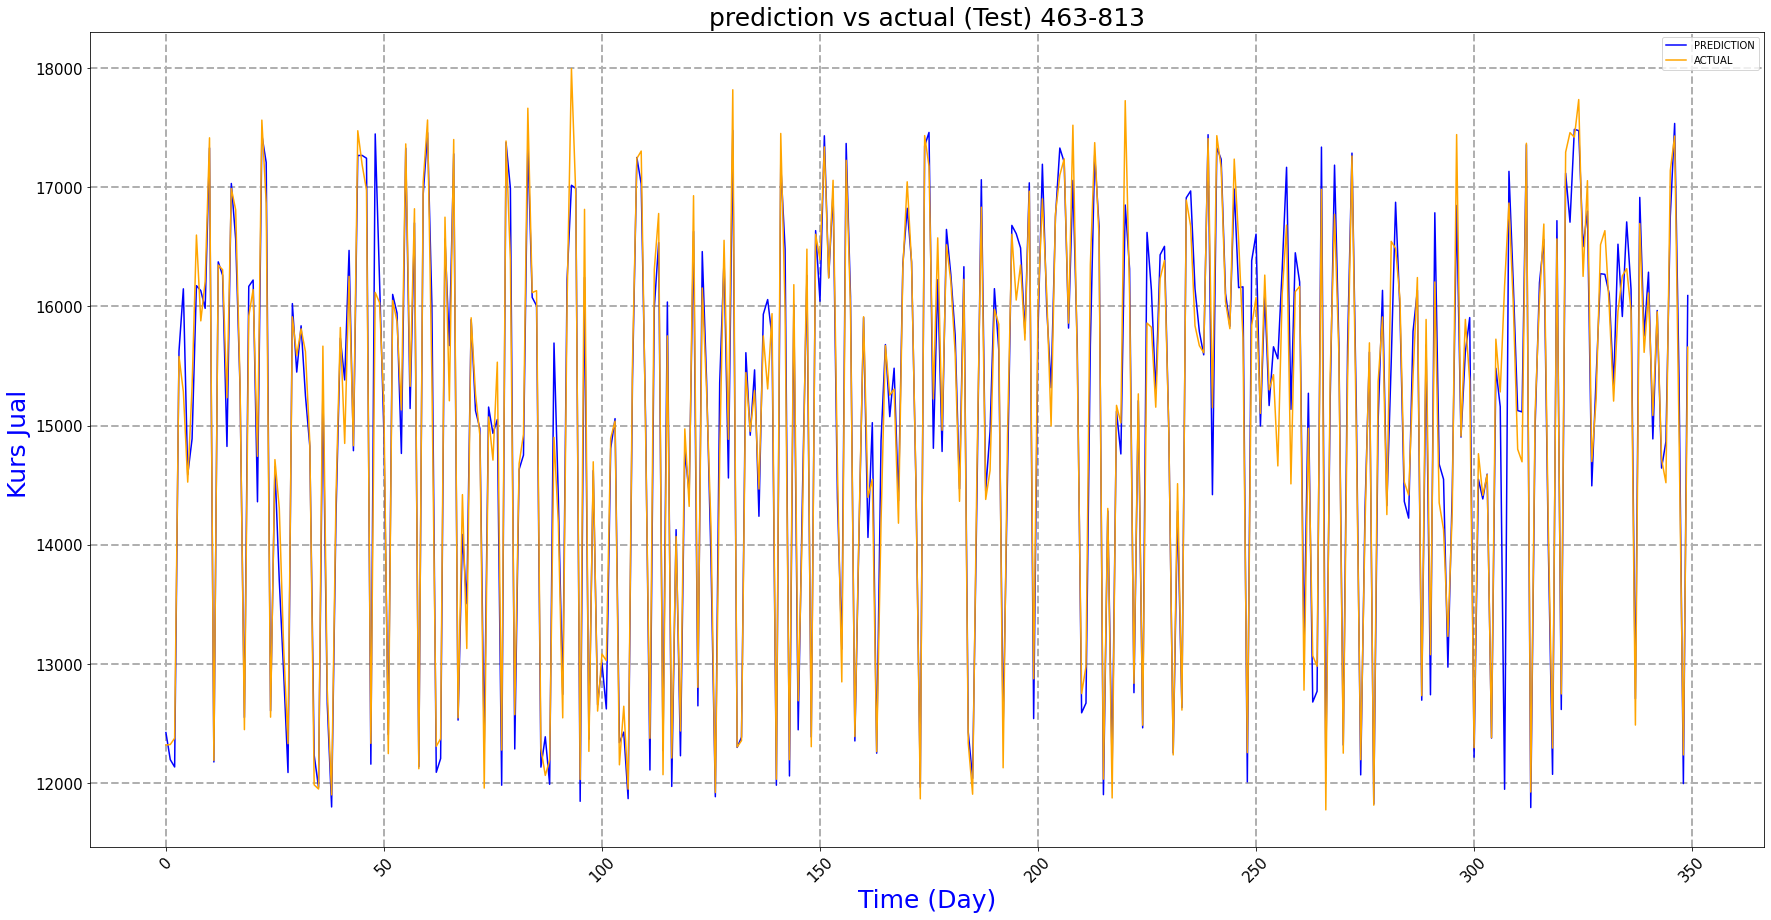

In [39]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[463:814],label='PREDICTION', color='blue')
plt.plot(nilai_test[463:814],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 463-813', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

### Plot Prediksi VS Aktual (Dataset Kurs Jual)

In [41]:
Prediksi_Kurs = model10_svr.predict(KursJual_scale)
print(Prediksi_Kurs.reshape(-1,1))

[[0.07415907]
 [0.07983466]
 [0.07524632]
 ...
 [0.68797899]
 [0.68515984]
 [0.68887842]]


In [42]:
NilaiPrediction_Kurs = scalerX.inverse_transform(Prediksi_Kurs.reshape(-1,1))
print(NilaiPrediction_Kurs)

[[12025.00933758]
 [12064.18940018]
 [12032.51494041]
 ...
 [16262.36783083]
 [16242.90650689]
 [16268.57681974]]


<function matplotlib.pyplot.show(*args, **kw)>

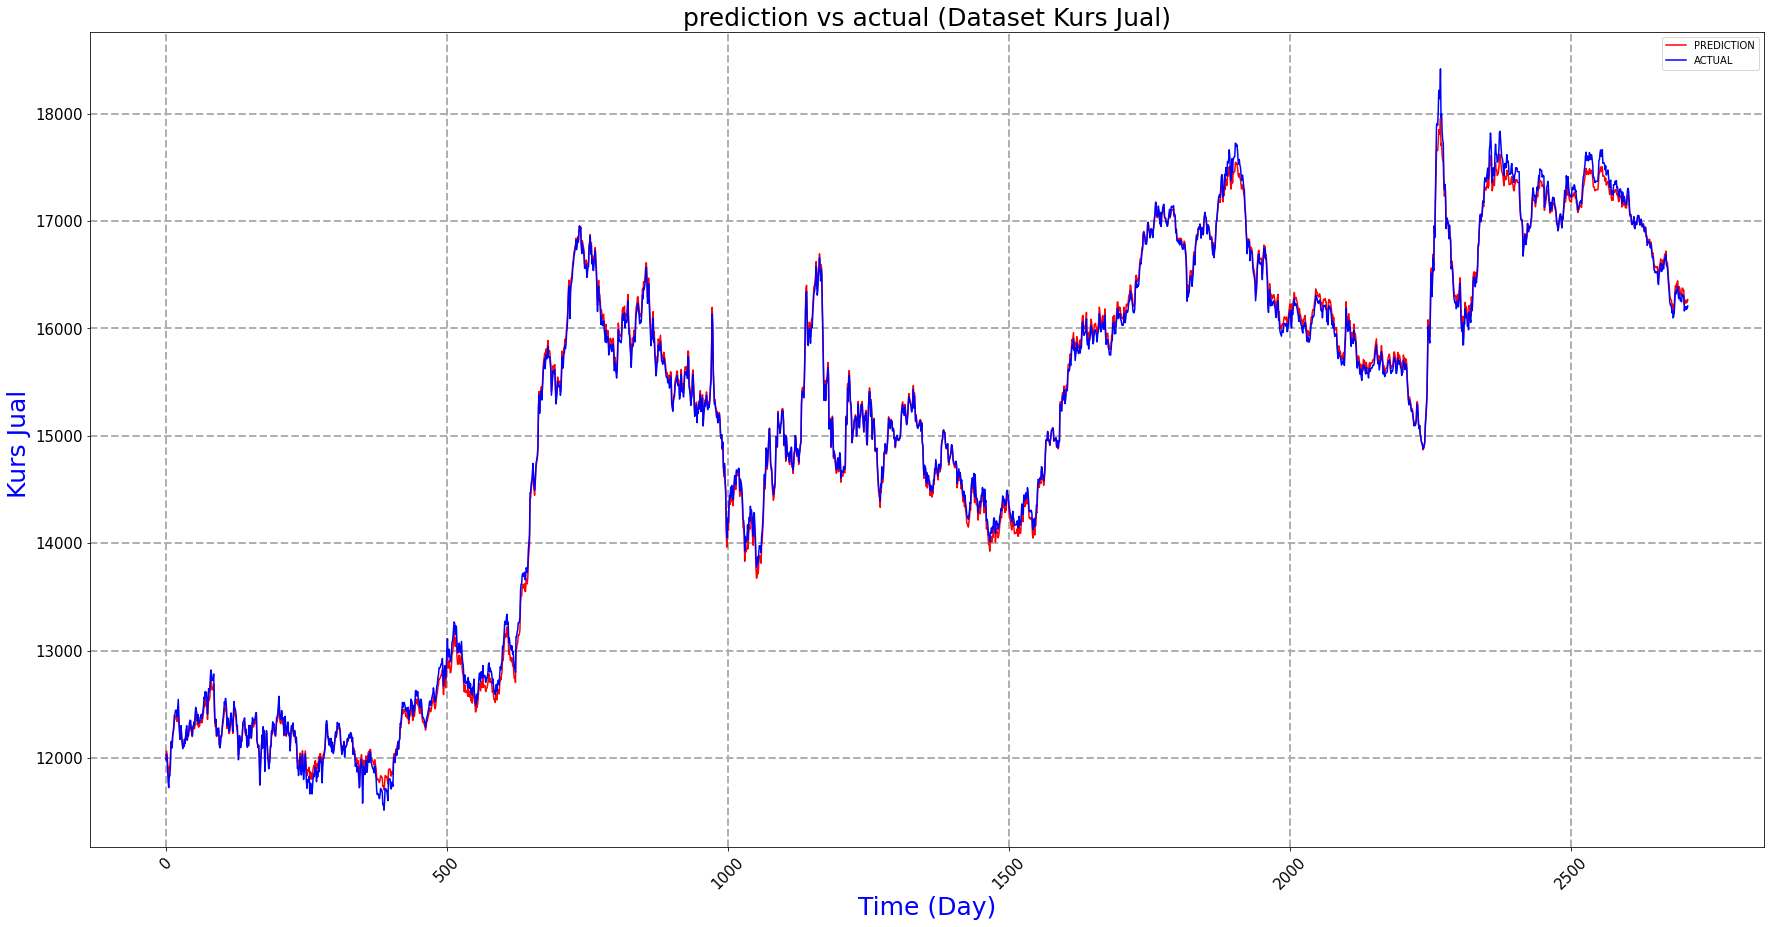

In [43]:
plt.figure(figsize=(30,15))
plt.plot(NilaiPrediction_Kurs,label='PREDICTION', color='red')
plt.plot(df['Kurs Jual'],label='ACTUAL', color='blue' )
plt.title('prediction vs actual (Dataset Kurs Jual)', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

In [51]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(KursJual_scale, Prediksi_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(KursJual_scale, Prediksi_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(KursJual_scale, Prediksi_Kurs)))

MSE  Prediksi : 0.00008
RMSE  Prediksi : 0.00911
R^2 Prediksi : 0.99871


In [52]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Kurs_Jual, NilaiPrediction_Kurs)))

MSE  Prediksi : 3952.01975
RMSE  Prediksi : 62.86509
R^2 Prediksi : 0.99871


# Prediksi 10 hari

In [53]:
prediction_10days = model10_svr.predict(Actual10_scale)
prediction_10days = prediction_10days.reshape(-1,1)
print(prediction_10days)

[[0.93314918]
 [0.84126815]
 [0.85833573]
 [0.02748334]
 [0.24710143]
 [0.24293442]
 [0.08569951]
 [0.24594584]
 [0.12827969]
 [0.28716205]]


In [54]:
NilaiPrediction_10 = scalerX.inverse_transform(prediction_10days)
print(NilaiPrediction_10.reshape(-1,1))

[[17954.84143135]
 [17320.56274815]
 [17438.38472096]
 [11702.79465314]
 [13218.87543482]
 [13190.10946063]
 [12104.67601062]
 [13210.89804622]
 [12398.61807464]
 [13495.42427873]]


In [56]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Actual10_scale, prediction_10days)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Actual10_scale, prediction_10days))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Actual10_scale, prediction_10days)))

MSE  Prediksi : 0.00069
RMSE  Prediksi : 0.02631
R^2 Prediksi : 0.99418


In [57]:
print('MSE  Prediksi : {0:.3f}'.format(mean_squared_error(actual_10days_array, NilaiPrediction_10)))
print('RMSE  Prediksi : {0:.3f}'.format(math.sqrt(mean_squared_error(actual_10days_array, NilaiPrediction_10))))
print('R^2 Prediksi : {0:.3f}'.format(r2_score(actual_10days_array, NilaiPrediction_10)))

MSE  Prediksi : 9008844.205
RMSE  Prediksi : 3001.474
R^2 Prediksi : -3117.287
